In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read and standarize the dataset
df = pd.read_csv('data/selected_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
df = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns.values)
df['target'] = y

# Divide dataframe depending on target
df_correct = df.loc[df['target'] == 1]
X_correct = df_correct.iloc[:,:-1].reset_index(drop=True)
y_correct = df_correct.iloc[:,-1].reset_index(drop=True)

df_incorrect = df.loc[df['target'] == 0]
X_incorrect = df_incorrect.iloc[:,:-1].reset_index(drop=True)
y_incorrect = df_incorrect.iloc[:,-1].reset_index(drop=True)

# Print each target shape
print('Target 1 shape: ' + str(df_correct.shape))
print('Target 0 shape: ' + str(df_incorrect.shape))

Target 1 shape: (5055, 39)
Target 0 shape: (4959, 39)


# Hotelling T2

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9).fit(X_correct)
len(pca.components_)

12

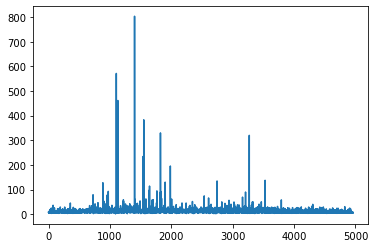

In [51]:
from models.hotelling.t2 import hotelling_tsquared
import matplotlib.pyplot as plt 

t2 = hotelling_tsquared(pca.transform(X_incorrect))

plt.plot(t2) # plotting by columns
plt.show()

In [39]:
from models.hotelling.t2 import hotelling_tsquared_v2

hotelling_tsquared_v2(X_incorrect.to_numpy(), num_components=12)

array([0.12201154, 0.13624565, 0.12920098, ..., 0.08906745, 0.12632545,
       0.06086768])

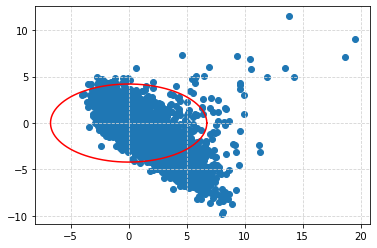

In [40]:
import matplotlib.pyplot as plt
import scipy, random

dataProject = pca.transform(X_incorrect)

#Calculate ellipse bounds and plot with scores
theta = np.concatenate((np.linspace(-np.pi, np.pi, 50), np.linspace(np.pi, -np.pi, 50)))
circle = np.array((np.cos(theta), np.sin(theta)))
sigma = np.cov(np.array((dataProject[:, 0], dataProject[:, 1])))
ed = np.sqrt(scipy.stats.chi2.ppf(0.95, 2))
ell = np.transpose(circle).dot(np.linalg.cholesky(sigma) * ed)
a, b = np.max(ell[: ,0]), np.max(ell[: ,1]) #95% ellipse bounds
t = np.linspace(0, 2 * np.pi, 100)

plt.scatter(dataProject[:, 0], dataProject[:, 1])
plt.plot(a * np.cos(t), b * np.sin(t), color = 'red')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()